In [84]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns


# Load Data

In [85]:
#Loading data into dataframes
character_df = pd.read_csv("fixed_characters.csv") #Do we need encoding ="latin-1"?
lines_df = pd.read_csv("fixed_lines.csv", encoding ="latin-1") 


In [86]:
lines_df

Unnamed: 0   lineId   chId   mId    chName  \
0                0    L1045     u0    m0    BIANCA   
1                1    L1044     u2    m0   CAMERON   
2                2     L985     u0    m0    BIANCA   
3                3     L984     u2    m0   CAMERON   
4                4     L925     u0    m0    BIANCA   
...            ...      ...    ...   ...       ...   
292938      293197  L666371  u9030  m616  DURNFORD   
292939      293198  L666370  u9034  m616   VEREKER   
292940      293199  L666369  u9030  m616  DURNFORD   
292941      293200  L666257  u9030  m616  DURNFORD   
292942      293201  L666256  u9034  m616   VEREKER   

                                                 dialogue  
0                                             They do not  
1                                              They do to  
2                                               I hope so  
3                                                She okay  
4                                                Let's go  
...                                                   ...  
292938  Lord Chelmsford seems to want me to stay back ...  
292939  I'm to take the Sikali with the main column to...  
292940                             Your orders Mr Vereker  
292941  Good ones yes Mr Vereker Gentlemen who can rid...  
292942  Colonel Durnford William Vereker I hear you 'v...  

[292943 rows x 6 columns]

In [87]:
character_df.head()

id      name movie_id                       title gender credit_position
0  u0    BIANCA       m0  10 things i hate about you      f               4
1  u1     BRUCE       m0  10 things i hate about you      M               ?
2  u2   CAMERON       m0  10 things i hate about you      m               3
3  u3  CHASTITY       m0  10 things i hate about you      F               ?
4  u4      JOEY       m0  10 things i hate about you      m               6

In [88]:
character_df.shape

(9034, 6)

# Normalize Data


In [89]:
# Change all text in name to lowercase
character_df.name = character_df.name.str.lower()
character_df

id           name movie_id                       title gender  \
0        u0         bianca       m0  10 things i hate about you      f   
1        u1          bruce       m0  10 things i hate about you      M   
2        u2        cameron       m0  10 things i hate about you      m   
3        u3       chastity       m0  10 things i hate about you      F   
4        u4           joey       m0  10 things i hate about you      m   
...     ...            ...      ...                         ...    ...   
9029  u9030       durnford     m616                   zulu dawn      ?   
9030  u9031        melvill     m616                   zulu dawn      ?   
9031  u9032  norris-newman     m616                   zulu dawn      M   
9032  u9033   stuart smith     m616                   zulu dawn      ?   
9033  u9034        vereker     m616                   zulu dawn      ?   

     credit_position  
0                  4  
1                  ?  
2                  3  
3                  ?  
4                  6  
...              ...  
9029               ?  
9030               ?  
9031               ?  
9032               ?  
9033               ?  

[9034 rows x 6 columns]

In [90]:
# Fix the tabs and spacing in rows with errors
def reset_tabs(row):
  character_id = row['id']
  name = row['name']
  movie_id = row['movie_id']
  title = row['title']
  gender = row['gender']
  credit_position = row['credit_position']
  if '\t' in character_id:
    lst = character_id.split('\t')
    character_id = lst[0]
    name = lst[1]
    movie_id = lst[2]
    title = lst[3]
    gender = lst[4]
    credit_position = lst[5]
    print(character_id)
  series = pd.Series([character_id, name, movie_id, title, gender, credit_position])
  return series

In [91]:
character_df = character_df.apply(reset_tabs, axis=1)

u1602
u1866
u4660
u4664
u5011
u6736
u6737
u6738
u6739
u6740
u6741
u6742
u6743
u7230
u7845
u7914
u7917


In [92]:
character_df
character_df[character_df[1].isnull()]
character_df.dropna()

0              1     2                           3  4  5
0        u0         bianca    m0  10 things i hate about you  f  4
1        u1          bruce    m0  10 things i hate about you  M  ?
2        u2        cameron    m0  10 things i hate about you  m  3
3        u3       chastity    m0  10 things i hate about you  F  ?
4        u4           joey    m0  10 things i hate about you  m  6
...     ...            ...   ...                         ... .. ..
9029  u9030       durnford  m616                   zulu dawn  ?  ?
9030  u9031        melvill  m616                   zulu dawn  ?  ?
9031  u9032  norris-newman  m616                   zulu dawn  M  ?
9032  u9033   stuart smith  m616                   zulu dawn  ?  ?
9033  u9034        vereker  m616                   zulu dawn  ?  ?

[9032 rows x 6 columns]

In [93]:
character_df = character_df.rename(columns={
    0: 'id',
    1: 'name',
    2: 'movie_id',
    3: 'title',
    4: 'gender',
    5: 'credit_position'
})

character_df

id           name movie_id                       title gender  \
0        u0         bianca       m0  10 things i hate about you      f   
1        u1          bruce       m0  10 things i hate about you      M   
2        u2        cameron       m0  10 things i hate about you      m   
3        u3       chastity       m0  10 things i hate about you      F   
4        u4           joey       m0  10 things i hate about you      m   
...     ...            ...      ...                         ...    ...   
9029  u9030       durnford     m616                   zulu dawn      ?   
9030  u9031        melvill     m616                   zulu dawn      ?   
9031  u9032  norris-newman     m616                   zulu dawn      M   
9032  u9033   stuart smith     m616                   zulu dawn      ?   
9033  u9034        vereker     m616                   zulu dawn      ?   

     credit_position  
0                  4  
1                  ?  
2                  3  
3                  ?  
4                  6  
...              ...  
9029               ?  
9030               ?  
9031               ?  
9032               ?  
9033               ?  

[9034 rows x 6 columns]

In [94]:
character_df['gender'].value_counts()

M    2456
?    2418
m    1899
F    1340
f     921
Name: gender, dtype: int64

In [95]:
character_df.dtypes

id                 object
name               object
movie_id           object
title              object
gender             object
credit_position    object
dtype: object

In [96]:
character_df['gender'][character_df.gender == '?'] = "N"

In [97]:
character_df['gender'].value_counts()

M    2456
N    2418
m    1899
F    1340
f     921
Name: gender, dtype: int64

In [98]:
character_df['gender'] = character_df['gender'].str.upper()

In [99]:
character_df = character_df.rename(columns={
   'id': 'chid',
})
character_df

chid           name movie_id                       title gender  \
0        u0         bianca       m0  10 things i hate about you      F   
1        u1          bruce       m0  10 things i hate about you      M   
2        u2        cameron       m0  10 things i hate about you      M   
3        u3       chastity       m0  10 things i hate about you      F   
4        u4           joey       m0  10 things i hate about you      M   
...     ...            ...      ...                         ...    ...   
9029  u9030       durnford     m616                   zulu dawn      N   
9030  u9031        melvill     m616                   zulu dawn      N   
9031  u9032  norris-newman     m616                   zulu dawn      M   
9032  u9033   stuart smith     m616                   zulu dawn      N   
9033  u9034        vereker     m616                   zulu dawn      N   

     credit_position  
0                  4  
1                  ?  
2                  3  
3                  ?  
4                  6  
...              ...  
9029               ?  
9030               ?  
9031               ?  
9032               ?  
9033               ?  

[9034 rows x 6 columns]

In [100]:
gender_count = character_df['gender'].value_counts()
gender_count

M    4355
N    2418
F    2261
Name: gender, dtype: int64

In [101]:
#Cleaning all of the hyphens out of the dialogue
newlines_df = lines_df
newlines_df['dialogue'] = newlines_df['dialogue'].replace('-', ' ', regex=True).astype(str)
newlines_df

Unnamed: 0   lineId   chId   mId    chName  \
0                0    L1045     u0    m0    BIANCA   
1                1    L1044     u2    m0   CAMERON   
2                2     L985     u0    m0    BIANCA   
3                3     L984     u2    m0   CAMERON   
4                4     L925     u0    m0    BIANCA   
...            ...      ...    ...   ...       ...   
292938      293197  L666371  u9030  m616  DURNFORD   
292939      293198  L666370  u9034  m616   VEREKER   
292940      293199  L666369  u9030  m616  DURNFORD   
292941      293200  L666257  u9030  m616  DURNFORD   
292942      293201  L666256  u9034  m616   VEREKER   

                                                 dialogue  
0                                             They do not  
1                                              They do to  
2                                               I hope so  
3                                                She okay  
4                                                Let's go  
...                                                   ...  
292938  Lord Chelmsford seems to want me to stay back ...  
292939  I'm to take the Sikali with the main column to...  
292940                             Your orders Mr Vereker  
292941  Good ones yes Mr Vereker Gentlemen who can rid...  
292942  Colonel Durnford William Vereker I hear you 'v...  

[292943 rows x 6 columns]

In [102]:
#Cleaning all of the double hyphens out of the dialogue
newlines_df['dialogue'] = newlines_df['dialogue'].replace('--', ' ', regex=True).astype(str)
newlines_df

Unnamed: 0   lineId   chId   mId    chName  \
0                0    L1045     u0    m0    BIANCA   
1                1    L1044     u2    m0   CAMERON   
2                2     L985     u0    m0    BIANCA   
3                3     L984     u2    m0   CAMERON   
4                4     L925     u0    m0    BIANCA   
...            ...      ...    ...   ...       ...   
292938      293197  L666371  u9030  m616  DURNFORD   
292939      293198  L666370  u9034  m616   VEREKER   
292940      293199  L666369  u9030  m616  DURNFORD   
292941      293200  L666257  u9030  m616  DURNFORD   
292942      293201  L666256  u9034  m616   VEREKER   

                                                 dialogue  
0                                             They do not  
1                                              They do to  
2                                               I hope so  
3                                                She okay  
4                                                Let's go  
...                                                   ...  
292938  Lord Chelmsford seems to want me to stay back ...  
292939  I'm to take the Sikali with the main column to...  
292940                             Your orders Mr Vereker  
292941  Good ones yes Mr Vereker Gentlemen who can rid...  
292942  Colonel Durnford William Vereker I hear you 'v...  

[292943 rows x 6 columns]

In [103]:
# testing to see if they were replaced
newlines_df['dialogue'].str.findall('--').value_counts

<bound method IndexOpsMixin.value_counts of 0         []
1         []
2         []
3         []
4         []
          ..
292938    []
292939    []
292940    []
292941    []
292942    []
Name: dialogue, Length: 292943, dtype: object>

In [104]:
newlines_df = newlines_df[['lineId', 'chId', 'mId', 'chName', 'dialogue']]
newlines_df

lineId   chId   mId    chName  \
0         L1045     u0    m0    BIANCA   
1         L1044     u2    m0   CAMERON   
2          L985     u0    m0    BIANCA   
3          L984     u2    m0   CAMERON   
4          L925     u0    m0    BIANCA   
...         ...    ...   ...       ...   
292938  L666371  u9030  m616  DURNFORD   
292939  L666370  u9034  m616   VEREKER   
292940  L666369  u9030  m616  DURNFORD   
292941  L666257  u9030  m616  DURNFORD   
292942  L666256  u9034  m616   VEREKER   

                                                 dialogue  
0                                             They do not  
1                                              They do to  
2                                               I hope so  
3                                                She okay  
4                                                Let's go  
...                                                   ...  
292938  Lord Chelmsford seems to want me to stay back ...  
292939  I'm to take the Sikali with the main column to...  
292940                             Your orders Mr Vereker  
292941  Good ones yes Mr Vereker Gentlemen who can rid...  
292942  Colonel Durnford William Vereker I hear you 'v...  

[292943 rows x 5 columns]

In [105]:
newlines_df = newlines_df.rename(columns={
   'chId': 'chid',
})
newlines_df

lineId   chid   mId    chName  \
0         L1045     u0    m0    BIANCA   
1         L1044     u2    m0   CAMERON   
2          L985     u0    m0    BIANCA   
3          L984     u2    m0   CAMERON   
4          L925     u0    m0    BIANCA   
...         ...    ...   ...       ...   
292938  L666371  u9030  m616  DURNFORD   
292939  L666370  u9034  m616   VEREKER   
292940  L666369  u9030  m616  DURNFORD   
292941  L666257  u9030  m616  DURNFORD   
292942  L666256  u9034  m616   VEREKER   

                                                 dialogue  
0                                             They do not  
1                                              They do to  
2                                               I hope so  
3                                                She okay  
4                                                Let's go  
...                                                   ...  
292938  Lord Chelmsford seems to want me to stay back ...  
292939  I'm to take the Sikali with the main column to...  
292940                             Your orders Mr Vereker  
292941  Good ones yes Mr Vereker Gentlemen who can rid...  
292942  Colonel Durnford William Vereker I hear you 'v...  

[292943 rows x 5 columns]

# Merge Datasets

In [106]:
#Merge the datasets so that every line has a gender associated with it
characterline_df = newlines_df.merge(character_df, on='chid', how='left')
characterline_df.head()

lineId chid mId   chName     dialogue     name movie_id  \
0  L1045   u0  m0   BIANCA  They do not   bianca       m0   
1  L1044   u2  m0  CAMERON   They do to  cameron       m0   
2   L985   u0  m0   BIANCA    I hope so   bianca       m0   
3   L984   u2  m0  CAMERON     She okay  cameron       m0   
4   L925   u0  m0   BIANCA     Let's go   bianca       m0   

                        title gender credit_position  
0  10 things i hate about you      F               4  
1  10 things i hate about you      M               3  
2  10 things i hate about you      F               4  
3  10 things i hate about you      M               3  
4  10 things i hate about you      F               4

In [107]:
#Normalize the dialogue in the new refined dataset
slim_df = characterline_df[['gender', 'dialogue']]
slim_df['dialogue'] = slim_df['dialogue'].apply(lambda x: x.lower())
slim_df

C:\Users\positivelyalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gender                                           dialogue
0           F                                        they do not
1           M                                         they do to
2           F                                          i hope so
3           M                                           she okay
4           F                                           let's go
...       ...                                                ...
292938      N  lord chelmsford seems to want me to stay back ...
292939      N  i'm to take the sikali with the main column to...
292940      N                             your orders mr vereker
292941      N  good ones yes mr vereker gentlemen who can rid...
292942      N  colonel durnford william vereker i hear you 'v...

[292943 rows x 2 columns]

In [108]:
slim_df.gender.fillna('N', inplace =True)


C:\Users\positivelyalli\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [109]:
slim_df.gender.isna().sum()

0

# Encode the gender labels

In [110]:
# slim_df.gender = [ 1 if each == 'f' elif each == 'M'{ slim_df.gender = 2} else 0 for each data.gender]
slim_df['gender'] = slim_df['gender'].replace('M', 0, regex=True)
slim_df['gender'] = slim_df['gender'].replace('F', 1, regex=True)
slim_df['gender'] = slim_df['gender'].replace('N', 2, regex=True)
slim_df

C:\Users\positivelyalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\positivelyalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\positivelyalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

gender                                           dialogue
0            1                                        they do not
1            0                                         they do to
2            1                                          i hope so
3            0                                           she okay
4            1                                           let's go
...        ...                                                ...
292938       2  lord chelmsford seems to want me to stay back ...
292939       2  i'm to take the sikali with the main column to...
292940       2                             your orders mr vereker
292941       2  good ones yes mr vereker gentlemen who can rid...
292942       2  colonel durnford william vereker i hear you 'v...

[292943 rows x 2 columns]

In [111]:
# slim_df['gender'] = slim_df['gender'].astype(int)
slim_df.dtypes

gender       int64
dialogue    object
dtype: object

In [112]:
#Looking at the counts for each gender
slim_df.gender.value_counts().values

array([187727,  82221,  22995], dtype=int64)

In [113]:
#Calculating the male/female counts - men get more than double the lines than women
# make a chart
slim_df.gender.value_counts().values[0]/slim_df.gender.value_counts().values[1]


2.28320015567799

In [114]:
characterline_df['name'].nunique()

5231

In [115]:
slim_df.to_csv('slim.csv')

# Remove Stopwords

In [116]:
# Remove Stopwords
import nltk
!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

Requirement already up-to-date: nltk in c:\users\positivelyalli\anaconda3\lib\site-packages (3.5)
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
type(stopwords.words('english'))

list

### Create new stopwords set to include character names

In [118]:
sw = stopwords.words('english')
names = character_df['name']
names = names.to_list()

sw.extend(names)
print(sw)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
# what type is sw?
type(sw)

list

### Sample Data to try removing stopwords and lemmatization

In [120]:
#Create sample data from a line of dialogue
sample_text = slim_df.dialogue[292940]
sample_text

'your orders mr vereker'

In [121]:
#Remove the stopwords from the sample data

#download the nltk words
nltk.download('punkt')
#text  = text .split()
sample_text  = nltk.word_tokenize(sample_text )
#if we use word_tokenize instead of split it will be better
#split() = shouldn't => shouldn't
#word_tokenize() = shouldn't => shouldn't and n't separate as two word
sample_text  = [word for word in sample_text  if not word in set(sw)]
sample_text 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['orders', 'mr']

In [122]:
type(sample_text)

list

In [123]:
#Stemming words or lemmatazation
import nltk 
nltk.download('wordnet')
from nltk.corpus import wordnet

lemma = nltk.WordNetLemmatizer()
sample_text = [lemma.lemmatize(word) for word in sample_text]
sample_text

# NOT WORKING - 
# TypeError: lemmatize() missing 1 required positional argument: 'word'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['order', 'mr']

In [124]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

sample_text = [porter_stemmer.stem(word) for word in sample_text]
sample_text

['order', 'mr']

In [125]:
#Turn words into one string
sample_text = " ".join(sample_text)
sample_text

'order mr'

# Remove stopwords and stem every line of dialogue

In [126]:
start_time = pd.Timestamp.now()
start_time

Timestamp('2020-06-20 10:52:31.713659')

In [48]:
dialogue = []
for x in slim_df.dialogue:
    description = nltk.word_tokenize(x)
    description = [word for word in description if not word in sw]
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    dialogue.append(description)

In [127]:
#
import time
dialogue_list = []

count = 1
start_time =  pd.Timestamp.now(tz='US/Pacific')
time_now = start_time
delta_time = 0
progress = 0
rate = 0
eta = 0
total_units = len(slim_df.dialogue)
time_end = 0
for dialogue in slim_df.dialogue:
    time_now =  pd.Timestamp.now(tz='US/Pacific')
    delta_time = time_now - start_time
    rate = delta_time / count
    remaining = total_units - count
    eta = remaining * rate
    time_end = (start_time + eta) #to time stamp string....
    if count %10000 == 0:
      print(str(pd.Timestamp(time_end)))
      print(count)
    if count == 10:
      print(str(pd.Timestamp(time_end)))
      print(count)
    dialogue = nltk.word_tokenize(dialogue)
    dialogue = [ word for word in dialogue if not word in set(sw)]
    lemma = nltk.WordNetLemmatizer()
    dialogue = [lemma.lemmatize(word) for word in dialogue]
    dialogue = " ".join(dialogue)
    dialogue_list.append(dialogue)
    count = count + 1
    
    
dialogue_list

2020-06-20 11:06:42.965830300-07:00
10
2020-06-20 11:11:34.066091512-07:00
10000
2020-06-20 11:11:11.071816355-07:00
20000
2020-06-20 11:11:03.656701550-07:00
30000
2020-06-20 11:11:21.996837844-07:00
40000
2020-06-20 11:10:29.493668894-07:00
50000
2020-06-20 11:10:01.524816304-07:00
60000
2020-06-20 11:09:24.552417383-07:00
70000
2020-06-20 11:08:46.990594832-07:00
80000
2020-06-20 11:07:56.254606319-07:00
90000
2020-06-20 11:07:04.825857123-07:00
100000
2020-06-20 11:06:20.353485758-07:00
110000
2020-06-20 11:05:28.721032564-07:00
120000
2020-06-20 11:04:37.047999333-07:00
130000
2020-06-20 11:03:47.754877304-07:00
140000
2020-06-20 11:02:55.847998958-07:00
150000
2020-06-20 11:02:11.510312816-07:00
160000
2020-06-20 11:01:25.415733365-07:00
170000
2020-06-20 11:00:38.155938599-07:00
180000
2020-06-20 10:59:54.583215746-07:00
190000
2020-06-20 10:59:09.954301043-07:00
200000
2020-06-20 10:58:26.968154698-07:00
210000
2020-06-20 10:57:42.512113605-07:00
220000
2020-06-20 10:56:59.7228

['',
 '',
 '',
 'okay',
 "let 's go",
 'wow',
 "okay 're gon na need learn lie",
 '',
 "'m kidding know sometimes become persona n't know quit",
 'like fear wearing pastel',
 'real',
 'good stuff',
 "figured 'd get good stuff eventually",
 'thank hear one story coiffure',
 "endless babble 'm like boring",
 'crap',
 'listen crap',
 '',
 "guillermo say go lighter 're gon na look like extra 90210",
 'always selfish',
 '',
 "'s say",
 'well',
 "never wanted go 'me",
 '',
 'looked back party always seemed occupied',
 'ton',
 'fun tonight',
 'believe share instructor',
 'know',
 'look like thing worked tonight huh',
 'hi',
 "know 've ever heard say 'd dip dating smoke",
 "'s kind like pretty one",
 "lesbian found picture jared leto one drawer 'm pretty sure 's harboring sex tendency",
 "'s",
 "'m workin ' n't seem goin '",
 "really really really wan na go ca n't unless go",
 'sure',
 "eber 's deep conditioner every two day never ever use blowdryer without diffuser attachment",
 'get hair loo

In [128]:
 #Create a dataframe from the list and save it as a csv
dialogue_df = pd.DataFrame(dialogue_list, columns=['Dialogue'])
dialogue_df.to_csv('dialogue_list.csv')



# Bag of Words



In [129]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(dialogue_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

1000 most common words: ['able', 'absolutely', 'accept', 'accident', 'account', 'act', 'acting', 'action', 'actually', 'address', 'admit', 'advice', 'afford', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'ah', 'ahead', 'ai', 'air', 'alive', 'alright', 'american', 'angry', 'answer', 'anybody', 'anymore', 'apart', 'apartment', 'apologize', 'appreciate', 'area', 'arm', 'army', 'arrest', 'ask', 'asked', 'asking', 'asleep', 'asshole', 'attack', 'attention', 'aw', 'away', 'awful', 'aye', 'bad', 'bag', 'ball', 'bank', 'bar', 'bastard', 'bathroom', 'beach', 'beat', 'beautiful', 'beauty', 'bed', 'beer', 'beg', 'begin', 'beginning', 'believe', 'best', 'bet', 'better', 'big', 'bird', 'birthday', 'bitch', 'bite', 'black', 'blame', 'blind', 'block', 'blood', 'blow', 'blue', 'board', 'boat', 'bomb', 'book', 'born', 'bother', 'bottle', 'bought', 'bout', 'brain', 'break', 'breakfast', 'breath', 'bridge', 'bring', 'broke', 'broken', 'brother', 'brought', 'buck', 'build', 'building', 'built', 'bullet',

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
# list of the text documents
text = dialogue_list
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
#summarize
print(vectorizer.vocabulary_)
#encode doc
vector = vectorizer.transform(text)
#summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'okay': 27936, 'let': 22958, 'go': 16475, 'wow': 46070, 're': 32292, 'gon': 16601, 'na': 26508, 'need': 26751, 'learn': 22779, 'lie': 23064, 'kidding': 21777, 'know': 21996, 'sometimes': 36982, 'become': 4074, 'persona': 29682, 'quit': 31879, 'like': 23159, 'fear': 14279, 'wearing': 45037, 'pastel': 29217, 'real': 32328, 'good': 16622, 'stuff': 38355, 'figured': 14538, 'get': 16183, 'eventually': 13513, 'thank': 39734, 'hear': 17913, 'one': 28069, 'story': 38149, 'coiffure': 8033, 'endless': 13008, 'babble': 3419, 'boring': 5208, 'crap': 9331, 'listen': 23291, 'guillermo': 17209, 'say': 34559, 'lighter': 23135, 'look': 23564, 'extra': 13870, '90210': 787, 'always': 1965, 'selfish': 35140, 'well': 45143, 'never': 26902, 'wanted': 44796, 'me': 24753, 'looked': 23569, 'back': 3463, 'party': 29173, 'seemed': 35077, 'occupied': 27717, 'ton': 40587, 'fun': 15720, 'tonight': 40598, 'believe': 4235, 'share': 35466, 'instructor': 20325, 'thing': 39991, 'worked': 45971, 'huh': 19015, 'hi': 1830

(292943, 46804)
<class 'scipy.sparse.csr.csr_matrix'>


MemoryError: 

### Word Cloud

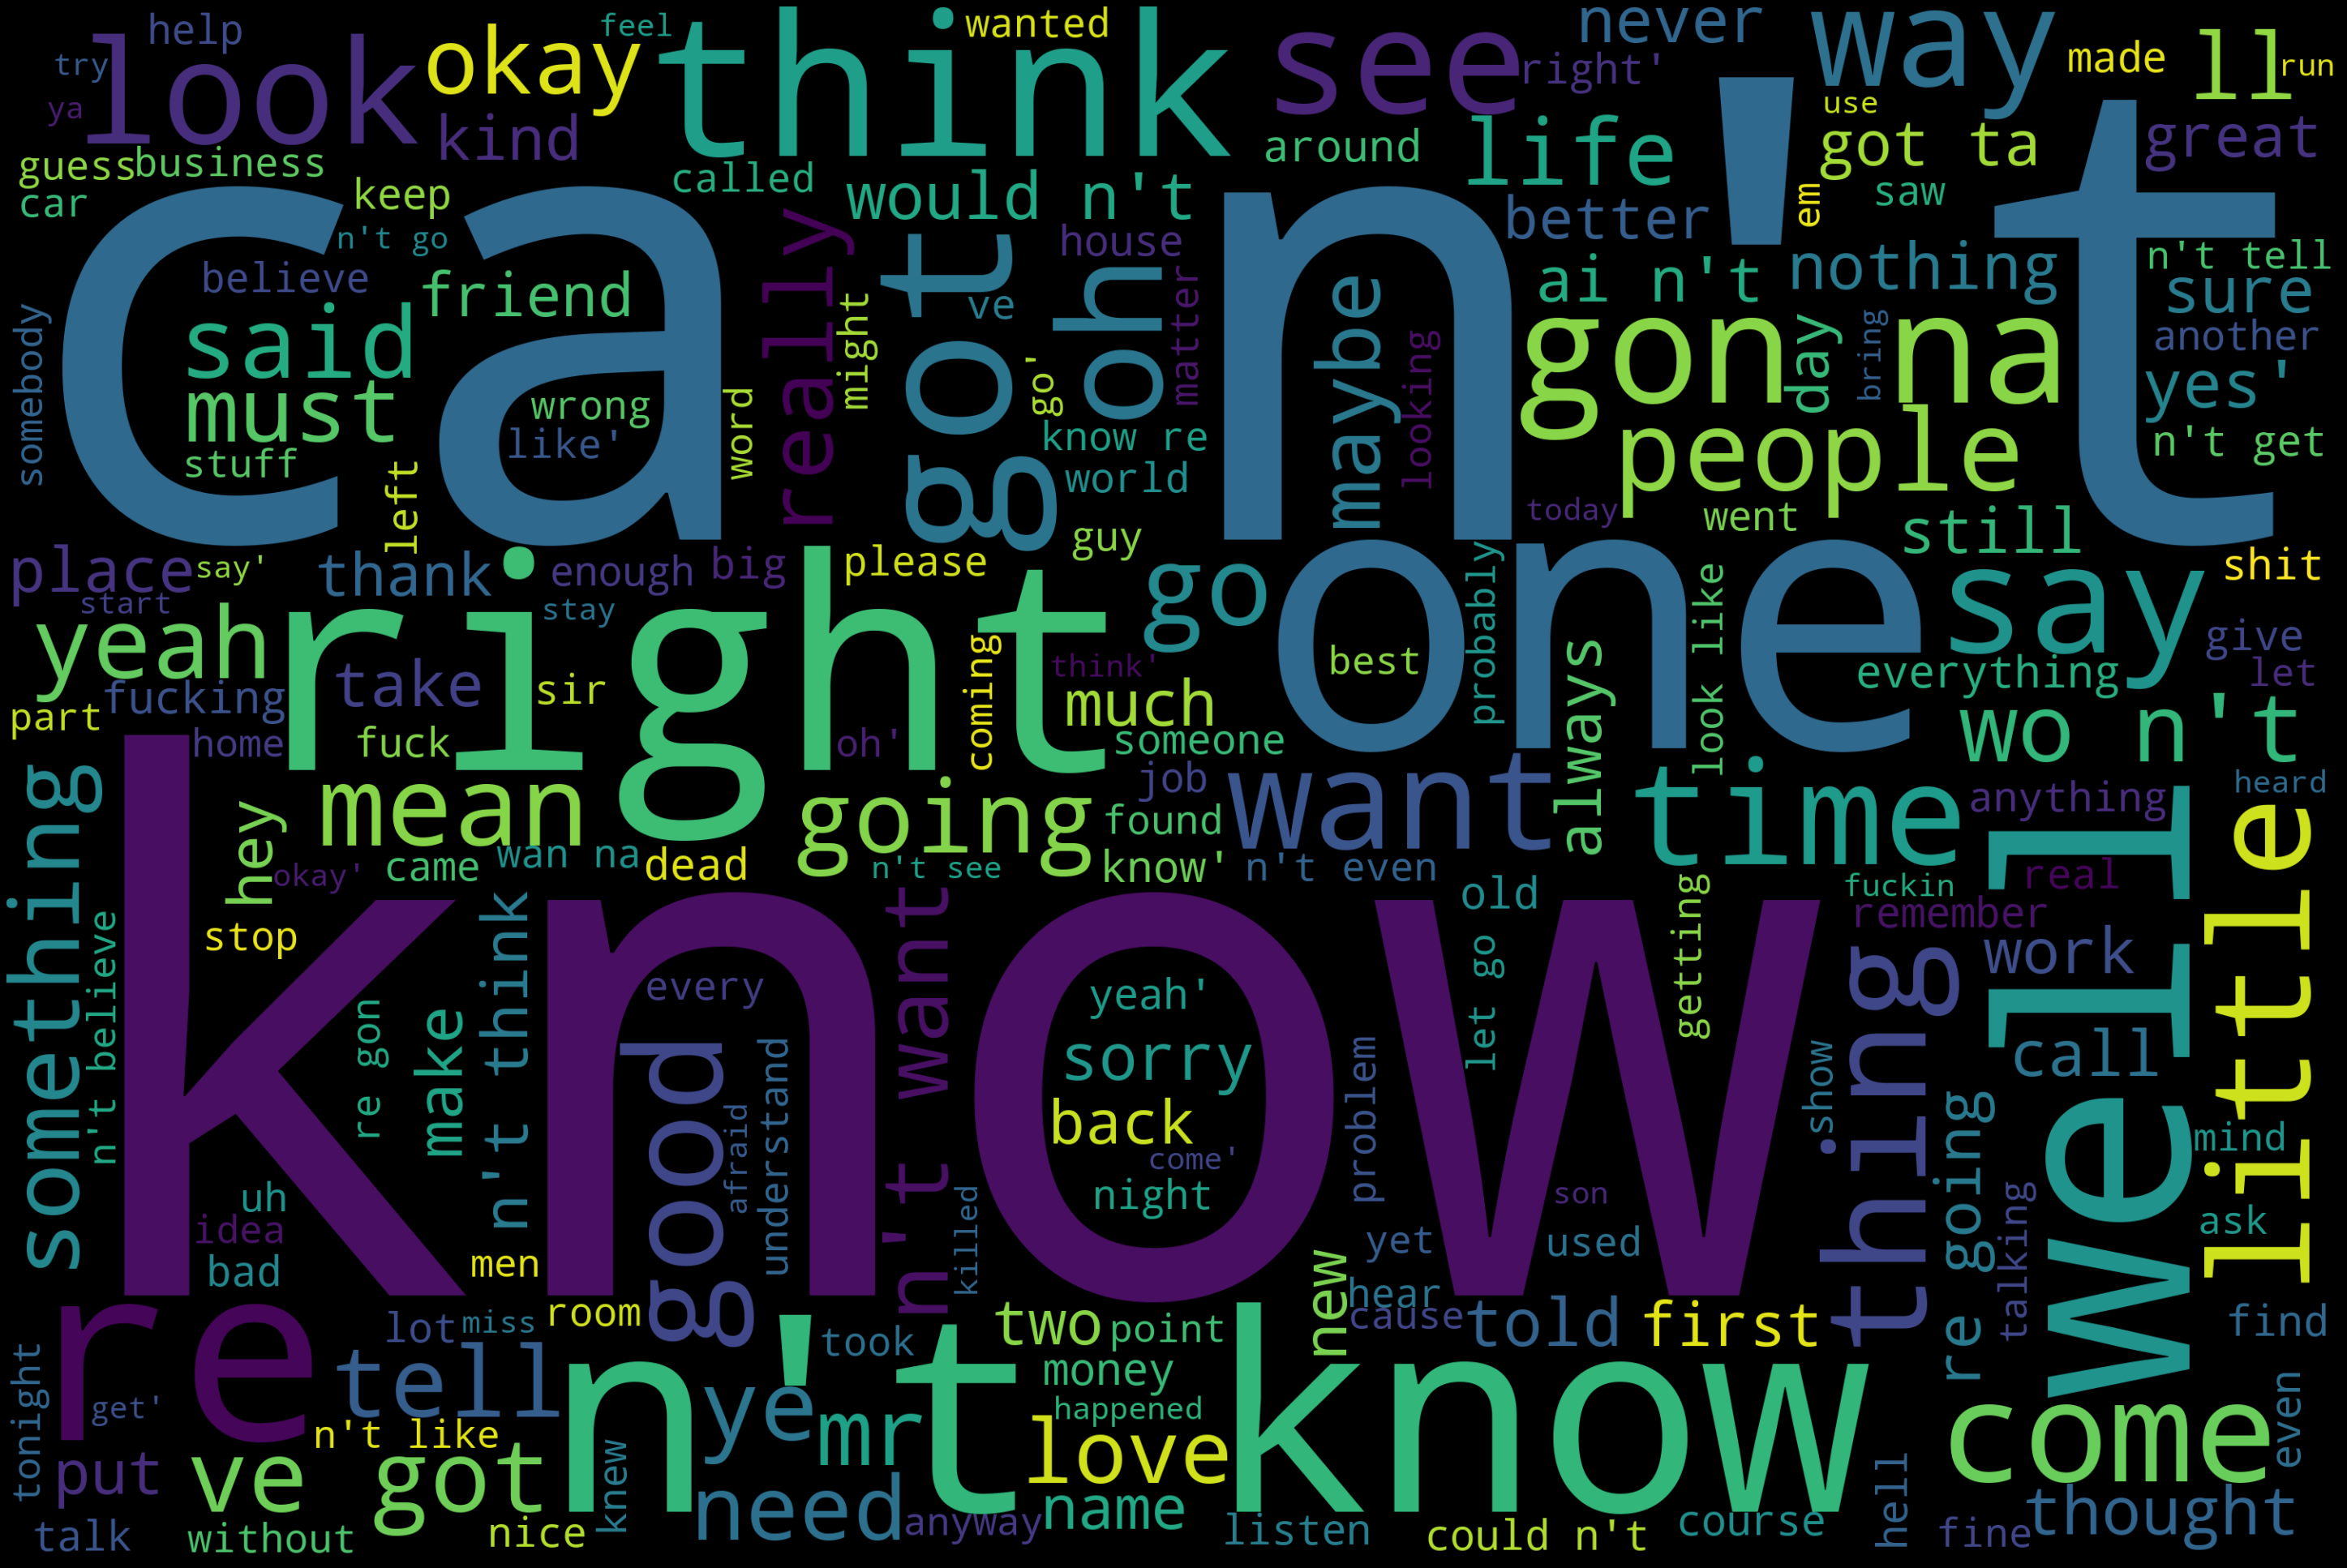

In [159]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = dialogue_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [163]:
plt.savefig('wordcloud_allg.png')

<Figure size 432x288 with 0 Axes>

Create dataframes for each gender 

In [171]:
female_df = slim_df[slim_df.gender == 1]
male_df = slim_df[slim_df.gender == 0]
non_df = slim_df[slim_df.gender == 2]

In [172]:
female_df

gender                                           dialogue
0            1                                        they do not
2            1                                          i hope so
4            1                                           let's go
6            1      okay    you're gonna need to learn how to lie
8            1  i'm kidding  you know how sometimes you just b...
...        ...                                                ...
292849       1                            look how far we've come
292851       1                                  i'm getting tired
292853       1    it's working  oh doctor    you play beautifully
292855       1                                 his schwanzstucker
292857       1   there must have been someone else down here then

[82221 rows x 2 columns]

In [175]:
#
import time
f_dialogue_list = []

count = 1
start_time =  pd.Timestamp.now(tz='US/Pacific')
time_now = start_time
delta_time = 0
progress = 0
rate = 0
eta = 0
total_units = len(female_df.dialogue)
time_end = 0
for dialogue in female_df.dialogue:
    time_now =  pd.Timestamp.now(tz='US/Pacific')
    delta_time = time_now - start_time
    rate = delta_time / count
    remaining = total_units - count
    eta = remaining * rate
    time_end = (start_time + eta) #to time stamp string....
    if count %10000 == 0:
      print(str(pd.Timestamp(time_end)))
      print(count)
    if count == 10:
      print(str(pd.Timestamp(time_end)))
      print(count)
    dialogue = nltk.word_tokenize(dialogue)
    dialogue = [ word for word in dialogue if not word in set(sw)]
    lemma = nltk.WordNetLemmatizer()
    dialogue = [lemma.lemmatize(word) for word in dialogue]
    dialogue = " ".join(dialogue)
    f_dialogue_list.append(dialogue)
    count = count + 1
    
    
f_dialogue_list

2020-06-20 11:58:22.116287700-07:00
10
2020-06-20 11:58:58.456670741-07:00
10000
2020-06-20 11:58:28.315850818-07:00
20000
2020-06-20 11:57:50.460865538-07:00
30000
2020-06-20 11:57:12.370017918-07:00
40000
2020-06-20 11:56:37.393743785-07:00
50000
2020-06-20 11:55:58.058639453-07:00
60000
2020-06-20 11:55:18.889812011-07:00
70000
2020-06-20 11:54:39.997166797-07:00
80000


['',
 '',
 "let 's go",
 "okay 're gon na need learn lie",
 "'m kidding know sometimes become persona n't know quit",
 'like fear wearing pastel',
 'good stuff',
 "endless babble 'm like boring",
 'listen crap',
 "guillermo say go lighter 're gon na look like extra 90210",
 '',
 'well',
 '',
 'ton',
 'know',
 'hi',
 "know 've ever heard say 'd dip dating smoke",
 "lesbian found picture jared leto one drawer 'm pretty sure 's harboring sex tendency",
 "really really really wan na go ca n't unless go",
 "eber 's deep conditioner every two day never ever use blowdryer without diffuser attachment",
 "'re sweet",
 "counted help cause thug obviously failing n't ever going date",
 '',
 'little find wench date plan progressing',
 'forget',
 "n't want know say though want know useful thing like good store much champagne cost stuff like chat never life point someone",
 "c'esc tete",
 'gosh could find',
 'unsolved mystery used really popular started high school like got sick something',
 "thing '

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(f_dialogue_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

from sklearn.feature_extraction.text import CountVectorizer
# list of the text documents
text = f_dialogue_list
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
#summarize
print(vectorizer.vocabulary_)
#encode doc
vector = vectorizer.transform(text)
#summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

1000 most common words: ['able', 'absolutely', 'accept', 'accident', 'account', 'act', 'acting', 'actually', 'address', 'admit', 'advice', 'affair', 'afford', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'ah', 'ahead', 'ai', 'air', 'airport', 'alive', 'allowed', 'alright', 'american', 'angry', 'animal', 'answer', 'anybody', 'anymore', 'apart', 'apartment', 'apologize', 'appreciate', 'arm', 'army', 'arrest', 'ask', 'asked', 'asking', 'asleep', 'asshole', 'attack', 'attention', 'aunt', 'aw', 'away', 'awful', 'awhile', 'baby', 'bad', 'bag', 'ball', 'bank', 'bar', 'bastard', 'bathroom', 'beach', 'beat', 'beautiful', 'bed', 'bedroom', 'beer', 'beg', 'begin', 'beginning', 'believe', 'best', 'bet', 'better', 'big', 'bird', 'birthday', 'bitch', 'black', 'blame', 'blind', 'blood', 'bloody', 'blow', 'blue', 'board', 'boat', 'book', 'boring', 'born', 'bother', 'bought', 'bout', 'brain', 'break', 'breakfast', 'breath', 'brilliant', 'bring', 'bringing', 'broke', 'broken', 'brought', 'buck', 'build

{'let': 10922, 'go': 7899, 'okay': 13185, 're': 15291, 'gon': 7960, 'na': 12552, 'need': 12652, 'learn': 10823, 'lie': 10981, 'kidding': 10419, 'know': 10524, 'sometimes': 17607, 'become': 1826, 'persona': 13992, 'quit': 15095, 'like': 11026, 'fear': 6879, 'wearing': 21353, 'pastel': 13757, 'good': 7970, 'stuff': 18285, 'endless': 6230, 'babble': 1527, 'boring': 2378, 'listen': 11079, 'crap': 4381, 'guillermo': 8229, 'say': 16419, 'lighter': 11016, 'look': 11204, 'extra': 6666, '90210': 295, 'well': 21407, 'ton': 19359, 'hi': 8756, 've': 20908, 'ever': 6456, 'heard': 8577, 'dip': 5319, 'dating': 4762, 'smoke': 17433, 'lesbian': 10909, 'found': 7374, 'picture': 14129, 'jared': 10092, 'leto': 10925, 'one': 13234, 'drawer': 5746, 'pretty': 14674, 'sure': 18507, 'harboring': 8453, 'sex': 16826, 'tendency': 18910, 'really': 15324, 'wan': 21212, 'ca': 2823, 'unless': 20416, 'eber': 5988, 'deep': 4907, 'conditioner': 3959, 'every': 6459, 'two': 19810, 'day': 4778, 'never': 12727, 'use': 20662

(82221, 22138)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


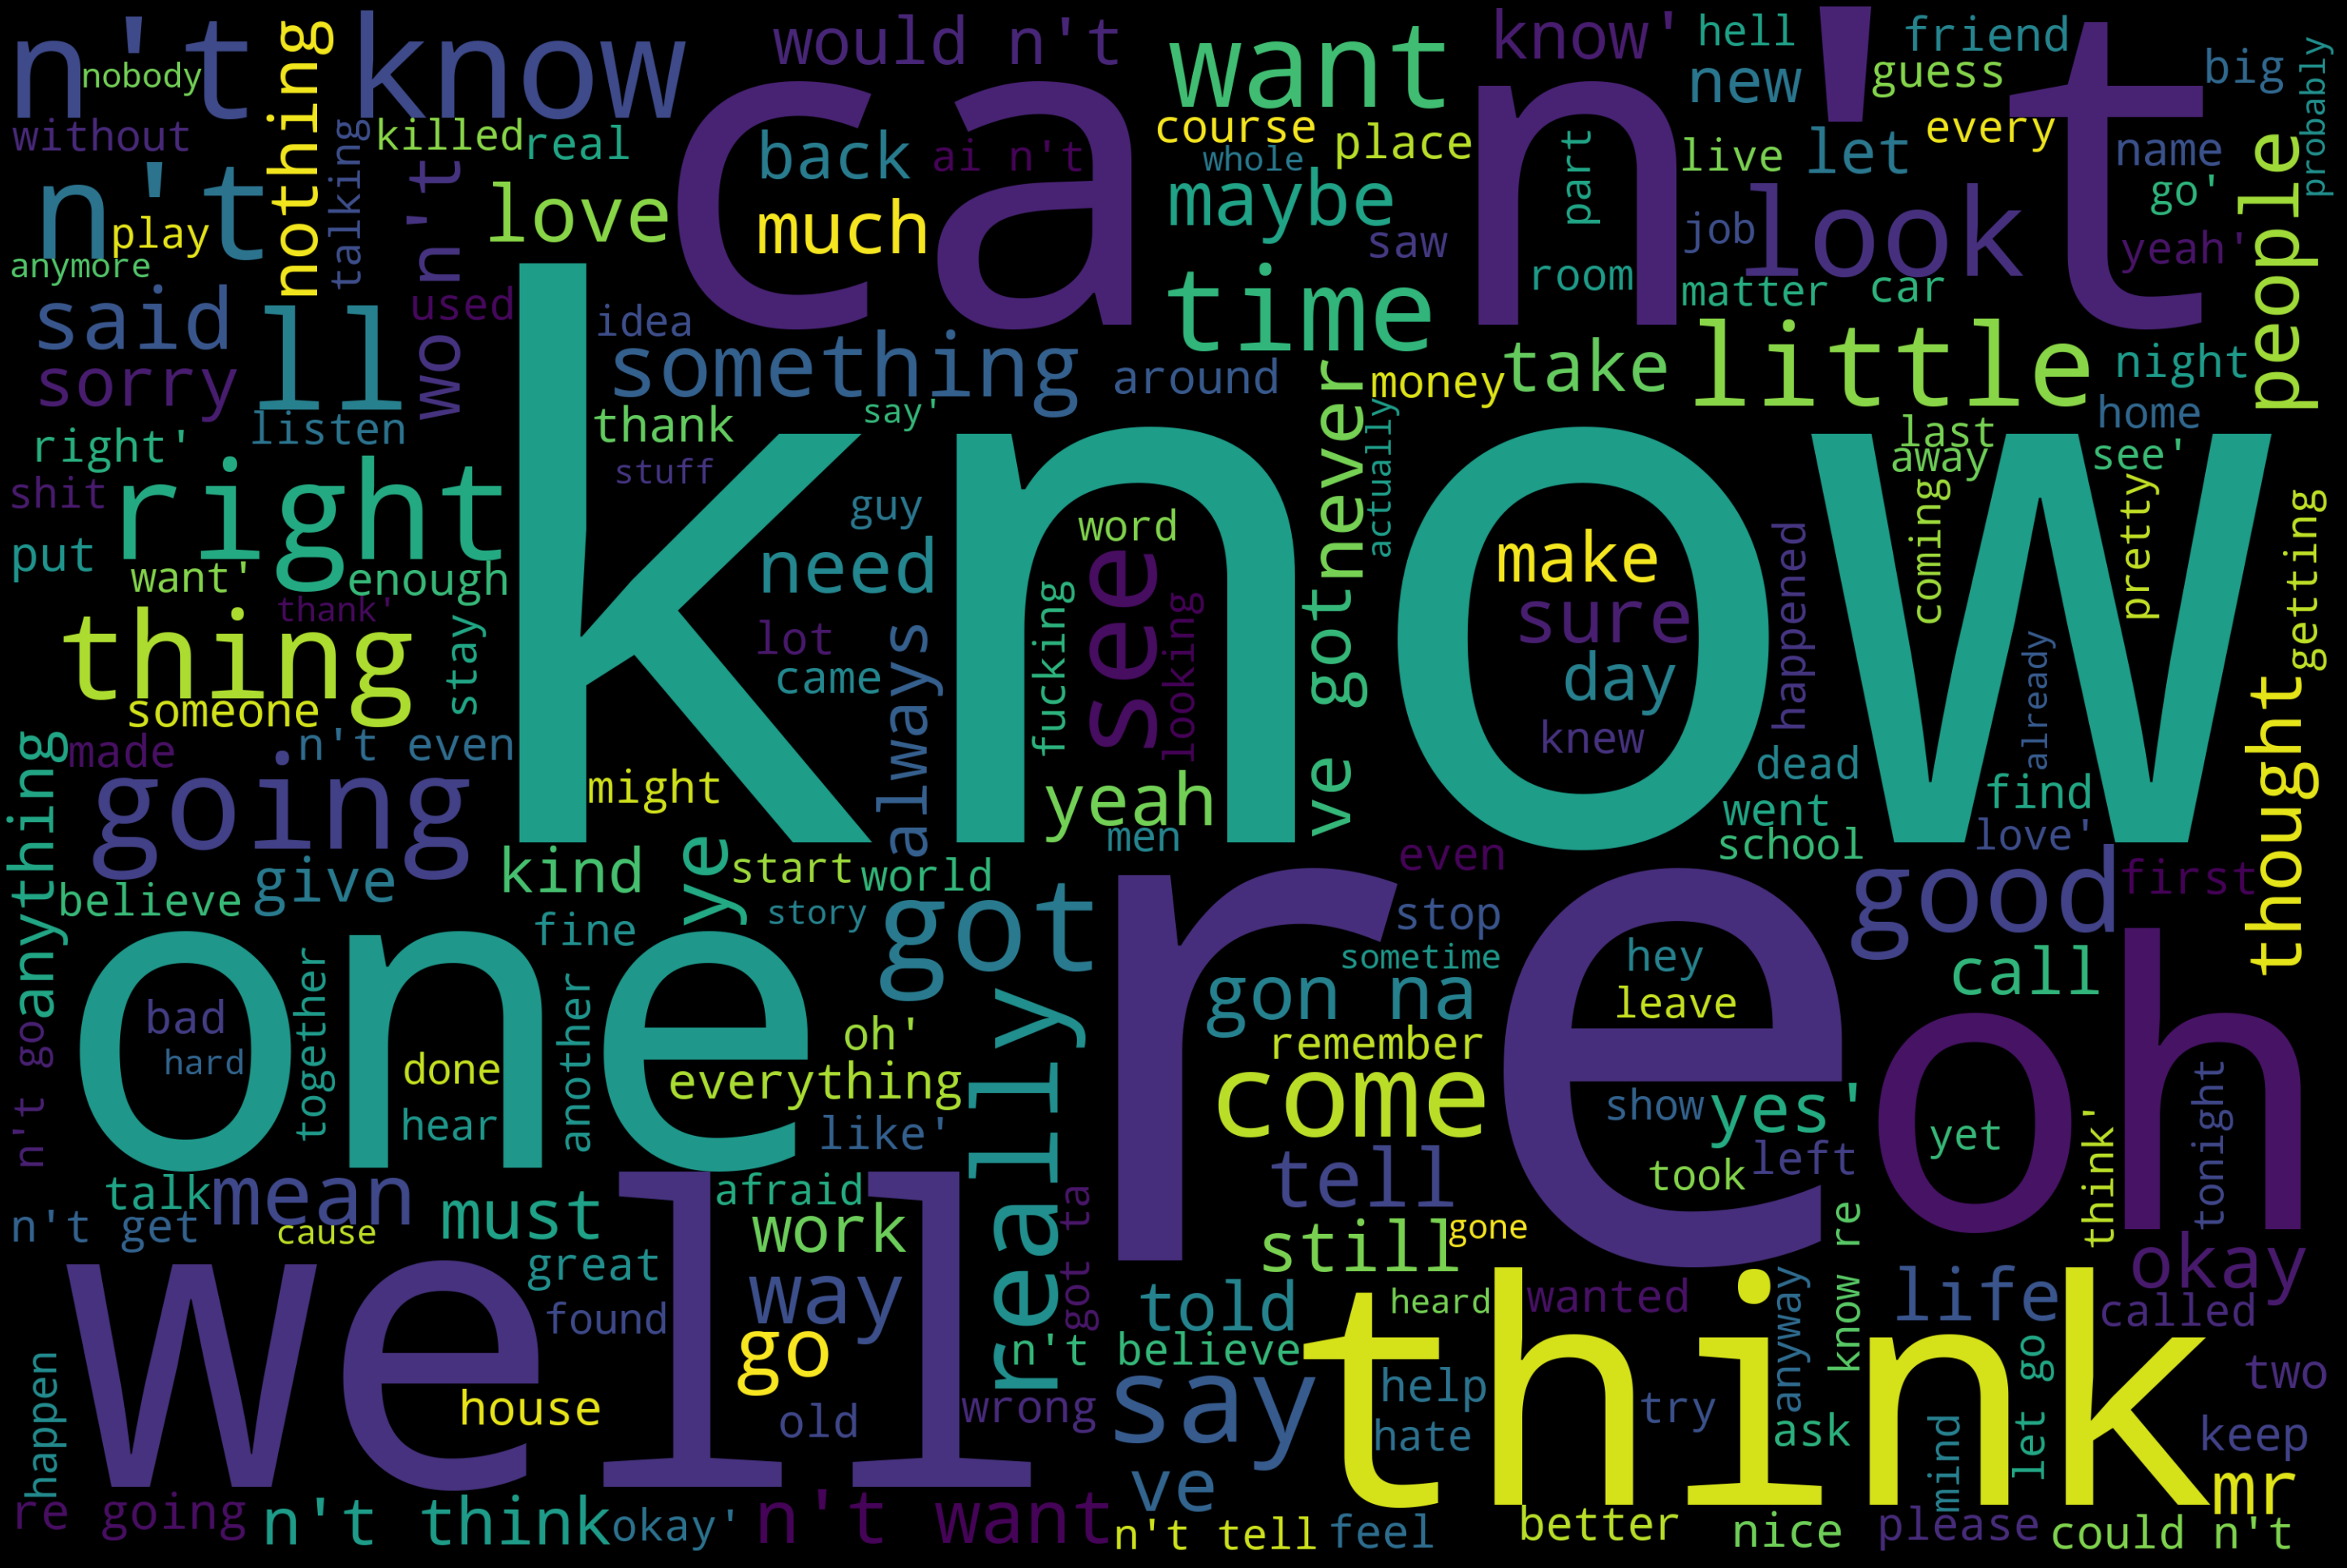

<Figure size 432x288 with 0 Axes>

In [177]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = f_dialogue_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('femalewordcloud.png')

In [178]:
 #Create a dataframe from the list and save it as a csv
f_dialogue_df = pd.DataFrame(f_dialogue_list, columns=['Dialogue'])
f_dialogue_df.to_csv('f_dialogue_list.csv')

In [173]:
male_df

gender                                           dialogue
1            0                                         they do to
3            0                                           she okay
5            0                                                wow
7            0                                                 no
10           0                                       the real you
...        ...                                                ...
292884       0  so attack is your defence well let's hope cets...
292886       0  if i've got it right my lord you lead an invas...
292888       0  they spurred onto high ground my lord full of ...
292890       0   indeedldid mylord itwas one ofthe first to cross
292892       0  excuse me my lord  norris newman of the standa...

[187727 rows x 2 columns]

In [ ]:
#
import time
m_dialogue_list = []

count = 1
start_time =  pd.Timestamp.now(tz='US/Pacific')
time_now = start_time
delta_time = 0
progress = 0
rate = 0
eta = 0
total_units = len(male_df.dialogue)
time_end = 0
for dialogue in male_df.dialogue:
    time_now =  pd.Timestamp.now(tz='US/Pacific')
    delta_time = time_now - start_time
    rate = delta_time / count
    remaining = total_units - count
    eta = remaining * rate
    time_end = (start_time + eta) #to time stamp string....
    if count %10000 == 0:
      print(str(pd.Timestamp(time_end)))
      print(count)
    if count == 10:
      print(str(pd.Timestamp(time_end)))
      print(count)
    dialogue = nltk.word_tokenize(dialogue)
    dialogue = [ word for word in dialogue if not word in set(sw)]
    lemma = nltk.WordNetLemmatizer()
    dialogue = [lemma.lemmatize(word) for word in dialogue]
    dialogue = " ".join(dialogue)
    m_dialogue_list.append(dialogue)
    count = count + 1
    
    
m_dialogue_list

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(m_dialogue_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

from sklearn.feature_extraction.text import CountVectorizer
# list of the text documents
text = m_dialogue_list
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
#summarize
print(vectorizer.vocabulary_)
#encode doc
vector = vectorizer.transform(text)
#summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = m_dialogue_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('malewordcloud.png')

In [174]:
non_df

gender                                           dialogue
679          2                                    if god wills it
682          2  don't you realize your words could be consider...
684          2  if god intended our proximity to asia do you b...
686          2                is that all that interests you gold
689          2                       your life and that of others
...        ...                                                ...
292938       2  lord chelmsford seems to want me to stay back ...
292939       2  i'm to take the sikali with the main column to...
292940       2                             your orders mr vereker
292941       2  good ones yes mr vereker gentlemen who can rid...
292942       2  colonel durnford william vereker i hear you 'v...

[22995 rows x 2 columns]

# Split data into training and testing sets

In [131]:
#Split data into training and testing 

y = slim_df.iloc[:,0].values #male, female and non-gendered
x = sparce_matrix
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

# Apply Machine Learning Algorithm

### Naive Bayes 

In [149]:
#Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

print("accuracy: ",nb.score(x_test,y_test))

accuracy:  0.3257552483358935


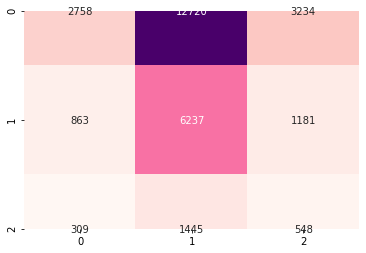

<Figure size 432x288 with 0 Axes>

In [151]:
y_pred = nb.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

sns.heatmap(cm_nb,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
plt.savefig('GNB.png')

### Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth=10)

rf.fit(x_train,y_train)

print("accuracy: ",rf.score(x_test,y_test))

accuracy:  0.6387438129373614


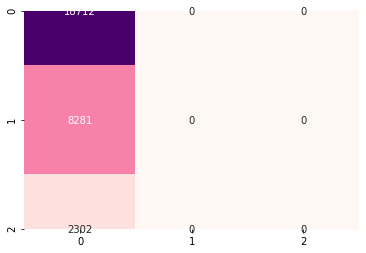

<Figure size 432x288 with 0 Axes>

In [152]:
y_pred = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

sns.heatmap(cm_nb,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
plt.savefig('RF.png')

In [145]:
y_pred
unique, counts = np.unique(y_pred, return_counts=True)

In [147]:
unique, counts # no predictions

(array([0], dtype=int64), array([29295], dtype=int64))

In [ ]:
### 

In [157]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train,y_train)

print("accuracy: ",mnb.score(x_test,y_test))

accuracy:  0.6365250042669397


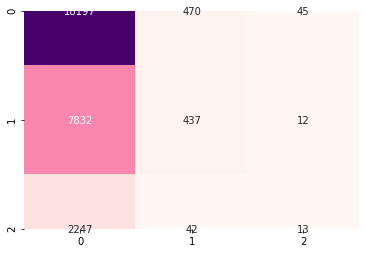

<Figure size 432x288 with 0 Axes>

In [158]:
y_pred = mnb.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

sns.heatmap(cm_nb,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
plt.savefig('MNB.png')

In [141]:
y_pred
unique, counts = np.unique(y_pred, return_counts=True)

In [142]:
unique

array([0, 1, 2], dtype=int64)

In [143]:
counts

array([28276,   949,    70], dtype=int64)